# <font color = red>BIKE SHARING ASSIGNMENT

## Data Cleaning & EDA

In [1]:
# Importing neccessary modules
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading and importing data
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- Instance not needed as it does not contributes any feature to the model
- dteday also not important as there is a seperate column for year (2018,2019) and month

In [3]:
# Dropping unwanted and irrelevant columns

df = df.drop(['instant','dteday'],axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Data check for null values
df.shape

(730, 14)

In [5]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


In [7]:
print(df.isnull().sum())

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


- **No Null values CONFIRMED**

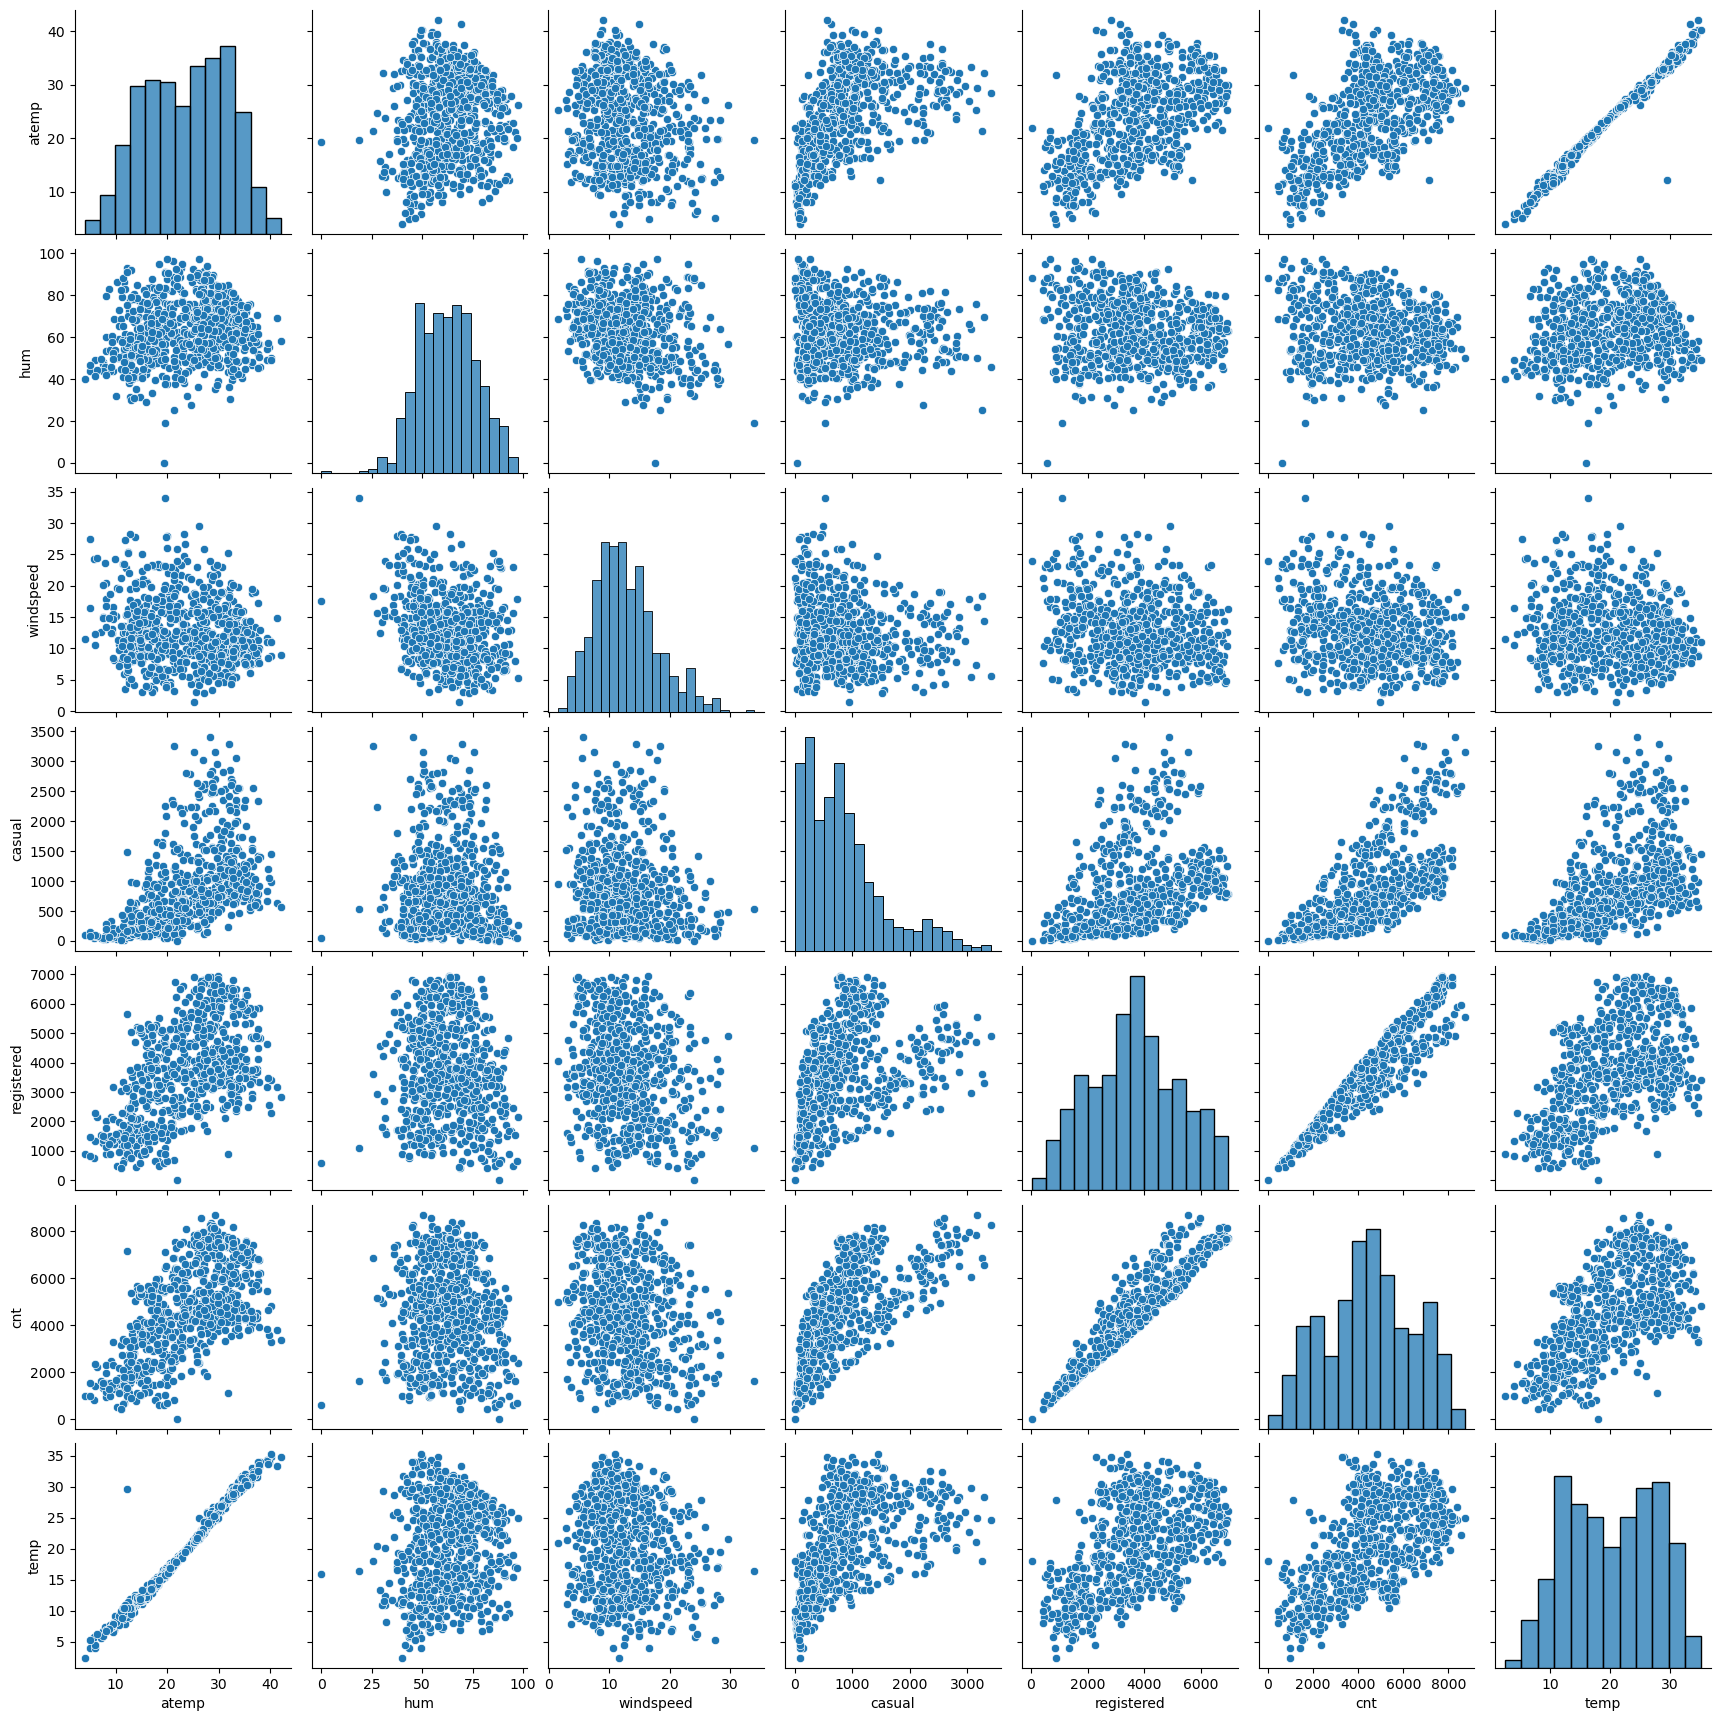

In [8]:
# Pairplot check

variable_list = ['atemp','hum','windspeed','casual','registered','cnt','temp']
sns.pairplot(df[variable_list])
plt.show()

 #### Inference 
 
 - A clear linear relation can be seen in CNT and atemp and casual/registered
 - <font color = red> Remove casual and registered as it is higly correlated to CNT and represent CNT (sum) itself

In [9]:
# 'casual' and 'registered' is relatable 'cnt' so drop 'casual' and 'registered'
df = df.drop(['casual','registered'], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


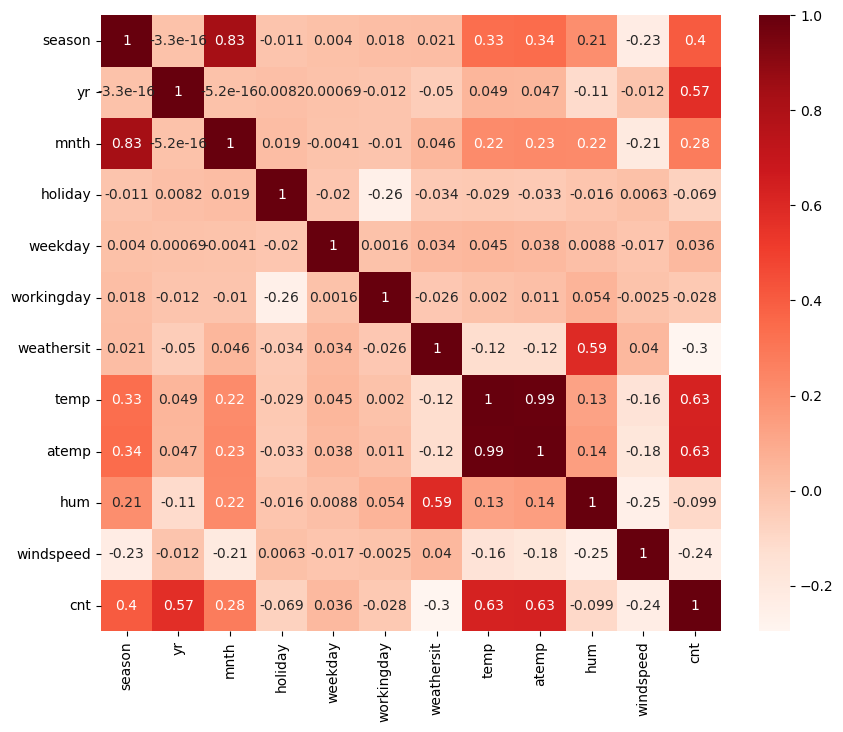

In [10]:
# heat map to understand the correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap = 'Reds', annot = True)
plt.show()

 #### Inference
 
  - You can see some hight correlations which needs to be taken care of
  - CNT is having high correlation with season,atemp,temp and yr
  - <font color = red> Vey high Correlation of temp and atemp 

In [11]:
# Dropping temp
df = df.drop(['temp'], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600


### Checking categorical variables

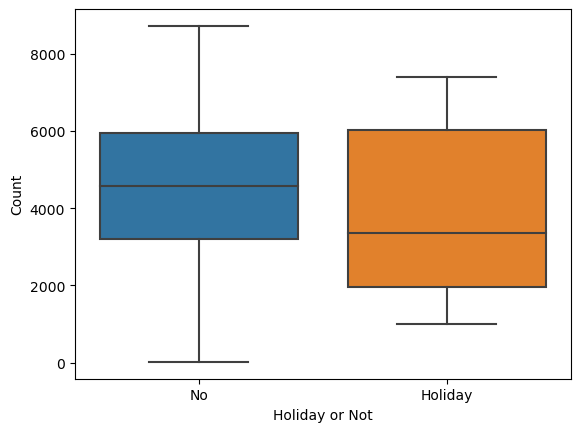

In [12]:

# cnt vs holiday
sns.boxplot(y = df['cnt'], x = df['holiday'])
plt.xticks(ticks= [0,1],labels=['No','Holiday'])
plt.xlabel('Holiday or Not')
plt.ylabel('Count')
plt.show()

-  Number of bike users are high on working days

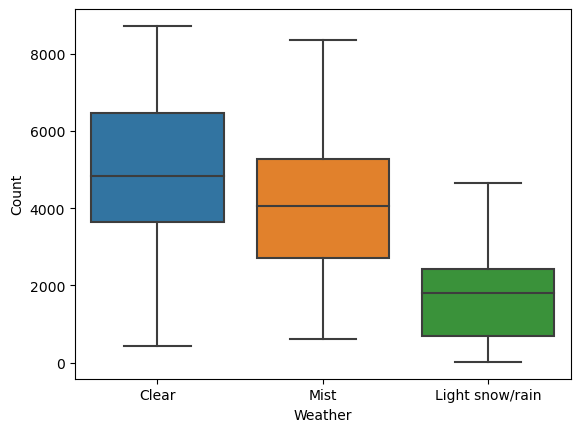

In [13]:
#cnt vs weathersit
sns.boxplot(y = df['cnt'], x = df['weathersit'])
plt.xticks(ticks= [0,1,2],labels=['Clear','Mist','Light snow/rain'])
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

#### Inference

- No 4th type of weather in the data
- Clear weather contributes the most to count
- Least in snowy or rainy conditions

In [14]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600


In [15]:
#Checking the number of cnt in each day of the week
df['weekday'].value_counts(ascending = False)

weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64

## Handling Categories & Dummies

In [16]:
# Converting numerical value seasons to respective seasons before Applying Dummy variables 
df['season'] = df['season'].replace(to_replace=[1,2,3,4],value=['Spring','Summer','Fall','Winter'])
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600
5,Spring,0,1,0,6,0,1,11.66045,51.8261,6.000868,1606
6,Spring,0,1,0,0,0,2,10.44195,49.8696,11.304642,1510
7,Spring,0,1,0,1,1,2,8.11270,53.5833,17.875868,959
8,Spring,0,1,0,2,1,1,5.80875,43.4167,24.250650,822
9,Spring,0,1,0,3,1,1,7.54440,48.2917,14.958889,1321


In [17]:
# Converting numerical value of weekday to respective weekday before Applying Dummy variables 

df['weekday'] = df['weekday'].replace({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday', 5:'Friday', 6:'Saturday'})
df.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,1,0,Monday,1,2,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,Tuesday,1,2,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,Wednesday,1,1,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,Thursday,1,1,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,Friday,1,1,11.46350,43.6957,12.522300,1600
5,Spring,0,1,0,Saturday,0,1,11.66045,51.8261,6.000868,1606
6,Spring,0,1,0,Sunday,0,2,10.44195,49.8696,11.304642,1510
7,Spring,0,1,0,Monday,1,2,8.11270,53.5833,17.875868,959
8,Spring,0,1,0,Tuesday,1,1,5.80875,43.4167,24.250650,822
9,Spring,0,1,0,Wednesday,1,1,7.54440,48.2917,14.958889,1321


In [18]:
# Converting numerical value of weathersit to respective weather detail before Applying Dummy variables 

df['weathersit'] = df['weathersit'].replace({1:'Clear/Partialy Cloudy',2:'Misty/Cloudy weather',3:'Light Snow/Rain',4:'Heavy Rain/ Thunderstorm'})
df.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,1,0,Monday,1,Misty/Cloudy weather,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,Tuesday,1,Misty/Cloudy weather,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,Wednesday,1,Clear/Partialy Cloudy,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,Thursday,1,Clear/Partialy Cloudy,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,Friday,1,Clear/Partialy Cloudy,11.46350,43.6957,12.522300,1600
5,Spring,0,1,0,Saturday,0,Clear/Partialy Cloudy,11.66045,51.8261,6.000868,1606
6,Spring,0,1,0,Sunday,0,Misty/Cloudy weather,10.44195,49.8696,11.304642,1510
7,Spring,0,1,0,Monday,1,Misty/Cloudy weather,8.11270,53.5833,17.875868,959
8,Spring,0,1,0,Tuesday,1,Clear/Partialy Cloudy,5.80875,43.4167,24.250650,822
9,Spring,0,1,0,Wednesday,1,Clear/Partialy Cloudy,7.54440,48.2917,14.958889,1321


In [19]:
# Converting numerical value of mnth to respective months  before Applying Dummy variables 

df['mnth'] = df['mnth'].replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
df.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Misty/Cloudy weather,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Misty/Cloudy weather,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear/Partialy Cloudy,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear/Partialy Cloudy,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear/Partialy Cloudy,11.46350,43.6957,12.522300,1600
5,Spring,0,January,0,Saturday,0,Clear/Partialy Cloudy,11.66045,51.8261,6.000868,1606
6,Spring,0,January,0,Sunday,0,Misty/Cloudy weather,10.44195,49.8696,11.304642,1510
7,Spring,0,January,0,Monday,1,Misty/Cloudy weather,8.11270,53.5833,17.875868,959
8,Spring,0,January,0,Tuesday,1,Clear/Partialy Cloudy,5.80875,43.4167,24.250650,822
9,Spring,0,January,0,Wednesday,1,Clear/Partialy Cloudy,7.54440,48.2917,14.958889,1321


In [20]:
# Checking for the count of cnt month-wise 
df['mnth'].value_counts()

mnth
January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: count, dtype: int64

**Dummy varibales**

In [21]:
#Season

dummy1 = pd.get_dummies(df['season'],dtype=int,drop_first=True)
dummy1.head(80)

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
75,1,0,0
76,1,0,0
77,1,0,0
78,1,0,0


In [22]:
# Concat dummy1 with main data frame and delete 'season'

df = pd.concat([df,dummy1],axis = 1)

In [23]:
df.drop('season',axis = 1,inplace=True)
df.head(10)

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,0,January,0,Monday,1,Misty/Cloudy weather,18.18125,80.5833,10.749882,985,1,0,0
1,0,January,0,Tuesday,1,Misty/Cloudy weather,17.68695,69.6087,16.652113,801,1,0,0
2,0,January,0,Wednesday,1,Clear/Partialy Cloudy,9.47025,43.7273,16.636703,1349,1,0,0
3,0,January,0,Thursday,1,Clear/Partialy Cloudy,10.60610,59.0435,10.739832,1562,1,0,0
4,0,January,0,Friday,1,Clear/Partialy Cloudy,11.46350,43.6957,12.522300,1600,1,0,0
5,0,January,0,Saturday,0,Clear/Partialy Cloudy,11.66045,51.8261,6.000868,1606,1,0,0
6,0,January,0,Sunday,0,Misty/Cloudy weather,10.44195,49.8696,11.304642,1510,1,0,0
7,0,January,0,Monday,1,Misty/Cloudy weather,8.11270,53.5833,17.875868,959,1,0,0
8,0,January,0,Tuesday,1,Clear/Partialy Cloudy,5.80875,43.4167,24.250650,822,1,0,0
9,0,January,0,Wednesday,1,Clear/Partialy Cloudy,7.54440,48.2917,14.958889,1321,1,0,0


In [24]:
# Weekdays 

dummy2 = pd.get_dummies(df['weekday'],dtype=int,drop_first=True)
df = pd.concat([df,dummy2],axis = 1)
df.drop('weekday',axis = 1,inplace=True)
df.head(10)

,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,January,0,1,Misty/Cloudy weather,18.18125,80.5833,10.749882,985,1,0,0,1,0,0,0,0,0
1,0,January,0,1,Misty/Cloudy weather,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0
2,0,January,0,1,Clear/Partialy Cloudy,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1
3,0,January,0,1,Clear/Partialy Cloudy,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0
4,0,January,0,1,Clear/Partialy Cloudy,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0
5,0,January,0,0,Clear/Partialy Cloudy,11.66045,51.8261,6.000868,1606,1,0,0,0,1,0,0,0,0
6,0,January,0,0,Misty/Cloudy weather,10.44195,49.8696,11.304642,1510,1,0,0,0,0,1,0,0,0
7,0,January,0,1,Misty/Cloudy weather,8.11270,53.5833,17.875868,959,1,0,0,1,0,0,0,0,0
8,0,January,0,1,Clear/Partialy Cloudy,5.80875,43.4167,24.250650,822,1,0,0,0,0,0,0,1,0
9,0,January,0,1,Clear/Partialy Cloudy,7.54440,48.2917,14.958889,1321,1,0,0,0,0,0,0,0,1


In [25]:
# Weather

dummy3 = pd.get_dummies(df['weathersit'],dtype=int,drop_first=True)
df = pd.concat([df,dummy3],axis = 1)
df.drop('weathersit',axis = 1,inplace=True)
df.head(10)

,yr,mnth,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow/Rain,Misty/Cloudy weather
0,0,January,0,1,18.18125,80.5833,10.749882,985,1,0,0,1,0,0,0,0,0,0,1
1,0,January,0,1,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,1
2,0,January,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0
3,0,January,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0
4,0,January,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,0
5,0,January,0,0,11.66045,51.8261,6.000868,1606,1,0,0,0,1,0,0,0,0,0,0
6,0,January,0,0,10.44195,49.8696,11.304642,1510,1,0,0,0,0,1,0,0,0,0,1
7,0,January,0,1,8.11270,53.5833,17.875868,959,1,0,0,1,0,0,0,0,0,0,1
8,0,January,0,1,5.80875,43.4167,24.250650,822,1,0,0,0,0,0,0,1,0,0,0
9,0,January,0,1,7.54440,48.2917,14.958889,1321,1,0,0,0,0,0,0,0,1,0,0


In [26]:
# Mnth

dummy4 = pd.get_dummies(df['mnth'],dtype=int,drop_first=True)
df = pd.concat([df,dummy4],axis = 1)
df.drop('mnth',axis = 1,inplace=True)
df.head(10)

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,December,February,January,July,June,March,May,November,October,September
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0
5,0,0,0,11.66045,51.8261,6.000868,1606,1,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,0,0,10.44195,49.8696,11.304642,1510,1,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0,1,8.11270,53.5833,17.875868,959,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0,0,1,5.80875,43.4167,24.250650,822,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,1,7.54440,48.2917,14.958889,1321,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [27]:
df.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'Spring', 'Summer', 'Winter', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Light Snow/Rain',
       'Misty/Cloudy weather', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September'],
      dtype='object')

 - Now data is ready for Modeling

##  Modeling 

In [28]:
# Import required modules for modeling

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
# Train - Test split
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [30]:
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,December,February,January,July,June,March,May,November,October,September
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [31]:
df_train.shape

(510, 29)

In [32]:
df_test.shape

(220, 29)

In [33]:
# Scaling Numerical variables using MinMax Scaling (Normalizing)

scaler = MinMaxScaler()
variable_list = ['atemp','hum','windspeed','cnt']
df_train[variable_list] = scaler.fit_transform(df_train[variable_list])
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,December,February,January,July,June,March,May,November,October,September
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#Checking whether all the values are in a range od 0 - 1
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,December,February,January,July,June,March,May,November,October,September
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392
std,0.500429,0.157763,0.453386,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
# Setting values for X_train and y_train

y_train = df_train.pop('cnt')
X_train = df_train
X_train.shape

(510, 28)

**Recursive Feature Elimination (RFE)** 

Getting the Top 16 predictors

In [36]:
# lr initialization and fitting
lr = LinearRegression()
lr.fit(X_train,y_train)

# rfe initialization and fitting
rfe = RFE(lr,n_features_to_select= 16)
rfe = rfe.fit(X_train,y_train)

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', False, 4),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 2),
 ('Sunday', False, 3),
 ('Thursday', False, 12),
 ('Tuesday', False, 7),
 ('Wednesday', False, 9),
 ('Light Snow/Rain', True, 1),
 ('Misty/Cloudy weather', True, 1),
 ('August', True, 1),
 ('December', True, 1),
 ('February', True, 1),
 ('January', True, 1),
 ('July', False, 10),
 ('June', False, 6),
 ('March', False, 13),
 ('May', False, 5),
 ('November', True, 1),
 ('October', False, 11),
 ('September', True, 1)]

In [38]:
# Predictors that RFE supports
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'Summer',
       'Winter', 'Light Snow/Rain', 'Misty/Cloudy weather', 'August',
       'December', 'February', 'January', 'November', 'September'],
      dtype='object')

In [39]:
df_train.shape

(510, 28)

**LM1. Creating Statsmodels to evaluate the taken columns**

- Setting only the top predictors inside X_train_lm1

In [40]:
X_train_lm1 = X_train[col]
X_train_lm1.head()

,yr,holiday,workingday,atemp,hum,windspeed,Summer,Winter,Light Snow/Rain,Misty/Cloudy weather,August,December,February,January,November,September
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0,0,0,1,0,0,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,0,0,0,0,0,1,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,1,0,0,1,0,0,0,0,0,0
111,0,0,0,0.318819,0.751824,0.380981,1,0,0,1,0,0,0,0,0,0


In [41]:
X_train_lm1.shape

(510, 16)

In [42]:
# Add constant to X_train 

X_train_sm1 = sm.add_constant(X_train_lm1)

In [43]:
# Create model

lr1 = sm.OLS(y_train,X_train_sm1).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.2
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          3.20e-186
Time:                        20:23:13   Log-Likelihood:                 510.69
No. Observations:                 510   AIC:                            -987.4
Df Residuals:                     493   BIC:                            -915.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3049      0.032      9.541      0.000       0.242       0.368
yr                       0.2312      0.008     28.421      0.000       0.215       0.247
holiday                 -0.0995      0.027     -3.717      0.000      -0.152      -0.047
workingday              -0.0208      0.009     -2.251      0.025      -0.039      -0.003
atemp                    0.4773      0.032     15.010      0.000       0.415       0.540
hum                     -0.1585      0.038     -4.172      0.000      -0.233      -0.084
windspeed               -0.1762      0.026     -6.778      0.000      -0.227      -0.125
Summer                   0.0802      0.013      6.390      0.000       0.056       0.105
Winter                   0.1352      0.014      9.481      0.000       0.107       0.163
Light Snow/Rain         -0.2430      0.027     -9.124      0.000      -0.295      -0.191
Misty/Cloudy weather    -0.0580      0.011     -5.476      0.000      -0.079      -0.037
August                   0.0605      0.016      3.701      0.000       0.028       0.093
December                -0.0499      0.018     -2.701      0.007      -0.086      -0.014
February                -0.0486      0.021     -2.308      0.021      -0.090      -0.007
January                 -0.0757      0.021     -3.569      0.000      -0.117      -0.034
November                -0.0406      0.019     -2.134      0.033      -0.078      -0.003
September                0.1116      0.017      6.707      0.000       0.079       0.144
==============================================================================
Omnibus:                       72.353   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.724
Skew:                          -0.743   Prob(JB):                     5.14e-38
Kurtosis:                       5.424   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Checking the columns
X_train_lm1.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'Summer',
       'Winter', 'Light Snow/Rain', 'Misty/Cloudy weather', 'August',
       'December', 'February', 'January', 'November', 'September'],
      dtype='object')

In [45]:
# calculate VIF(Variance Inflation Factor) to compare and make a decision

vif = pd.DataFrame()
X = X_train_lm1
vif['Predictors'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Predictors,VIF
4,hum,26.23
3,atemp,14.51
5,windspeed,3.96
2,workingday,3.68
7,Winter,3.06
6,Summer,2.30
9,Misty/Cloudy weather,2.29
0,yr,2.06
13,January,1.94
14,November,1.87


- model is having 0.84 R2 and 0.83 adjusted R2
- Some predictors have high value of VIF
- 1st Remove the one with the highest VIF value 'hum'

**LM2. Removing the variable with highest p-value - 'hum'**

In [46]:
X_train_lm2 = X_train_lm1.drop(['hum'],axis = 1)

# Checking the columns
X_train_lm2.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'windspeed', 'Summer', 'Winter',
       'Light Snow/Rain', 'Misty/Cloudy weather', 'August', 'December',
       'February', 'January', 'November', 'September'],
      dtype='object')

In [47]:
# Adiing costant and model creation 
X_train_sm2 = sm.add_constant(X_train_lm2)
lr2 = sm.OLS(y_train,X_train_sm2).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     169.4
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          1.19e-183
Time:                        20:23:15   Log-Likelihood:                 501.85
No. Observations:                 510   AIC:                            -971.7
Df Residuals:                     494   BIC:                            -903.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2267      0.026      8.618      0.000       0.175       0.278
yr                       0.2349      0.008     28.585      0.000       0.219       0.251
holiday                 -0.1030      0.027     -3.784      0.000      -0.156      -0.049
workingday              -0.0236      0.009     -2.519      0.012      -0.042      -0.005
atemp                    0.4450      0.031     14.195      0.000       0.383       0.507
windspeed               -0.1493      0.026     -5.832      0.000      -0.200      -0.099
Summer                   0.0751      0.013      5.911      0.000       0.050       0.100
Winter                   0.1243      0.014      8.720      0.000       0.096       0.152
Light Snow/Rain         -0.2872      0.025    -11.572      0.000      -0.336      -0.238
Misty/Cloudy weather    -0.0833      0.009     -9.444      0.000      -0.101      -0.066
August                   0.0579      0.017      3.490      0.001       0.025       0.091
December                -0.0578      0.019     -3.095      0.002      -0.094      -0.021
February                -0.0544      0.021     -2.547      0.011      -0.096      -0.012
January                 -0.0858      0.021     -4.009      0.000      -0.128      -0.044
November                -0.0405      0.019     -2.097      0.037      -0.078      -0.003
September                0.1045      0.017      6.214      0.000       0.071       0.138
==============================================================================
Omnibus:                       72.238   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.700
Skew:                          -0.747   Prob(JB):                     2.33e-37
Kurtosis:                       5.389   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# calculate VIF(Variance Inflation Factor) to compare and make a decision

vif = pd.DataFrame()
X=X_train_lm2
vif['Predictors'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Predictors,VIF
3,atemp,5.90
4,windspeed,3.92
2,workingday,3.52
6,Winter,2.69
5,Summer,2.10
0,yr,2.06
13,November,1.84
9,August,1.59
8,Misty/Cloudy weather,1.57
10,December,1.43


- the model is having the same R2 and the adjusted R2 value slightly increased to 0.84
- atemp's VIF value is very high

**LM3. Removing the variabel with highest p-value - 'atemp'**

In [49]:
X_train_lm3 = X_train_lm1.drop(['atemp','hum'],axis = 1)

# Checking the columns
X_train_lm3.columns

Index(['yr', 'holiday', 'workingday', 'windspeed', 'Summer', 'Winter',
       'Light Snow/Rain', 'Misty/Cloudy weather', 'August', 'December',
       'February', 'January', 'November', 'September'],
      dtype='object')

In [50]:
# Adiing costant and model creation 
X_train_sm3 = sm.add_constant(X_train_lm3)
lr3 = sm.OLS(y_train,X_train_sm3).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     118.9
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          3.12e-148
Time:                        20:23:17   Log-Likelihood:                 414.62
No. Observations:                 510   AIC:                            -799.2
Df Residuals:                     495   BIC:                            -735.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5340      0.018     30.158      0.000       0.499       0.569
yr                       0.2463      0.010     25.402      0.000       0.227       0.265
holiday                 -0.0994      0.032     -3.082      0.002      -0.163      -0.036
workingday              -0.0229      0.011     -2.063      0.040      -0.045      -0.001
windspeed               -0.2357      0.029     -7.994      0.000      -0.294      -0.178
Summer                   0.0471      0.015      3.169      0.002       0.018       0.076
Winter                   0.0839      0.017      5.069      0.000       0.051       0.116
Light Snow/Rain         -0.3099      0.029    -10.554      0.000      -0.368      -0.252
Misty/Cloudy weather    -0.0940      0.010     -9.026      0.000      -0.114      -0.074
August                   0.1026      0.019      5.312      0.000       0.065       0.141
December                -0.1664      0.020     -8.246      0.000      -0.206      -0.127
February                -0.2062      0.022     -9.404      0.000      -0.249      -0.163
January                 -0.2751      0.020    -13.850      0.000      -0.314      -0.236
November                -0.1099      0.022     -4.959      0.000      -0.153      -0.066
September                0.1210      0.020      6.081      0.000       0.082       0.160
==============================================================================
Omnibus:                       55.106   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.819
Skew:                          -0.722   Prob(JB):                     2.32e-19
Kurtosis:                       4.398   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif = pd.DataFrame()
X=X_train_lm3
vif['Predictors'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Predictors,VIF
3,windspeed,3.44
2,workingday,2.97
5,Winter,2.63
4,Summer,1.96
0,yr,1.89
12,November,1.82
7,Misty/Cloudy weather,1.56
9,December,1.42
11,January,1.33
8,August,1.30


- the model's R2 and adjusted R2 value reduced
 
Yet the model looks good with 
- good R2 value
- acceptable range of p-value and VIF

But lets remove some more variables having comparatively high p-value

**LM4. Remove 'workingday'** 

In [52]:
X_train_lm4 = X_train_lm1.drop(['atemp','hum','workingday'],axis = 1)

# Checking the columns
X_train_lm4.columns

Index(['yr', 'holiday', 'windspeed', 'Summer', 'Winter', 'Light Snow/Rain',
       'Misty/Cloudy weather', 'August', 'December', 'February', 'January',
       'November', 'September'],
      dtype='object')

In [53]:
# Adiing costant and model creation 
X_train_sm4 = sm.add_constant(X_train_lm4)
lr4 = sm.OLS(y_train,X_train_sm4).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     126.9
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          2.22e-148
Time:                        20:23:18   Log-Likelihood:                 412.43
No. Observations:                 510   AIC:                            -796.9
Df Residuals:                     496   BIC:                            -737.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5173      0.016     32.750      0.000       0.486       0.548
yr                       0.2464      0.010     25.337      0.000       0.227       0.266
holiday                 -0.0820      0.031     -2.625      0.009      -0.143      -0.021
windspeed               -0.2353      0.030     -7.958      0.000      -0.293      -0.177
Summer                   0.0459      0.015      3.080      0.002       0.017       0.075
Winter                   0.0823      0.017      4.960      0.000       0.050       0.115
Light Snow/Rain         -0.3090      0.029    -10.489      0.000      -0.367      -0.251
Misty/Cloudy weather    -0.0922      0.010     -8.856      0.000      -0.113      -0.072
August                   0.1026      0.019      5.295      0.000       0.065       0.141
December                -0.1653      0.020     -8.165      0.000      -0.205      -0.125
February                -0.2074      0.022     -9.434      0.000      -0.251      -0.164
January                 -0.2759      0.020    -13.847      0.000      -0.315      -0.237
November                -0.1111      0.022     -4.998      0.000      -0.155      -0.067
September                0.1212      0.020      6.072      0.000       0.082       0.160
==============================================================================
Omnibus:                       53.783   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.133
Skew:                          -0.706   Prob(JB):                     5.38e-19
Kurtosis:                       4.403   Cond. No.                         9.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif = pd.DataFrame()
X=X_train_lm4
vif['Predictors'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Predictors,VIF
2,windspeed,3.06
4,Winter,2.50
0,yr,1.85
3,Summer,1.81
11,November,1.81
6,Misty/Cloudy weather,1.56
8,December,1.41
10,January,1.27
9,February,1.26
7,August,1.23


The model still looks good 
 - R2 slightly reduced to 0.76
 - Adjusted R2 value of 0.76
  - acceptable range of VIF values
Lets make some more change

**LM5. Remove 'Windspeed' from the model** 

In [55]:
X_train_lm5 = X_train_lm4.drop(['windspeed'],axis = 1)

# Checking the columns
X_train_lm5.columns 

Index(['yr', 'holiday', 'Summer', 'Winter', 'Light Snow/Rain',
       'Misty/Cloudy weather', 'August', 'December', 'February', 'January',
       'November', 'September'],
      dtype='object')

In [56]:
# Adiing costant and model creation 
X_train_sm5 = sm.add_constant(X_train_lm5)
lr5 = sm.OLS(y_train,X_train_sm5).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     117.5
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          1.41e-136
Time:                        20:23:19   Log-Likelihood:                 381.79
No. Observations:                 510   AIC:                            -737.6
Df Residuals:                     497   BIC:                            -682.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4400      0.013     33.300      0.000       0.414       0.466
yr                       0.2456      0.010     23.804      0.000       0.225       0.266
holiday                 -0.0858      0.033     -2.591      0.010      -0.151      -0.021
Summer                   0.0407      0.016      2.573      0.010       0.010       0.072
Winter                   0.0935      0.018      5.332      0.000       0.059       0.128
Light Snow/Rain         -0.3322      0.031    -10.685      0.000      -0.393      -0.271
Misty/Cloudy weather    -0.0917      0.011     -8.302      0.000      -0.113      -0.070
August                   0.1184      0.020      5.787      0.000       0.078       0.159
December                -0.1624      0.021     -7.566      0.000      -0.205      -0.120
February                -0.2244      0.023     -9.665      0.000      -0.270      -0.179
January                 -0.2746      0.021    -12.992      0.000      -0.316      -0.233
November                -0.1201      0.024     -5.102      0.000      -0.166      -0.074
September                0.1385      0.021      6.581      0.000       0.097       0.180
==============================================================================
Omnibus:                       68.382   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.436
Skew:                          -0.826   Prob(JB):                     5.20e-26
Kurtosis:                       4.659   Cond. No.                         8.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
vif = pd.DataFrame()
X=X_train_lm5
vif['Predictors'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Predictors,VIF
3,Winter,2.41
10,November,1.78
0,yr,1.72
5,Misty/Cloudy weather,1.54
7,December,1.38
2,Summer,1.37
6,August,1.16
9,January,1.15
11,September,1.14
8,February,1.09


- R2 and adjusted R2 value declined
- Lets add some variables 

**LM6. Add  'Sunday' to LM5**

In [58]:
X_train_lm6 = X_train_lm5
X_train_lm6['Sunday'] = X_train['Sunday']

# Checking the columns
X_train_lm6.columns 

Index(['yr', 'holiday', 'Summer', 'Winter', 'Light Snow/Rain',
       'Misty/Cloudy weather', 'August', 'December', 'February', 'January',
       'November', 'September', 'Sunday'],
      dtype='object')

In [59]:
# Adiing costant and model creation 
X_train_sm6 = sm.add_constant(X_train_lm6)
lr6 = sm.OLS(y_train,X_train_sm6).fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     108.8
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          6.58e-136
Time:                        20:23:21   Log-Likelihood:                 382.69
No. Observations:                 510   AIC:                            -737.4
Df Residuals:                     496   BIC:                            -678.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4371      0.013     32.672      0.000       0.411       0.463
yr                       0.2454      0.010     23.797      0.000       0.225       0.266
holiday                 -0.0850      0.033     -2.567      0.011      -0.150      -0.020
Summer                   0.0415      0.016      2.625      0.009       0.010       0.073
Winter                   0.0941      0.018      5.372      0.000       0.060       0.129
Light Snow/Rain         -0.3312      0.031    -10.658      0.000      -0.392      -0.270
Misty/Cloudy weather    -0.0927      0.011     -8.380      0.000      -0.114      -0.071
August                   0.1189      0.020      5.817      0.000       0.079       0.159
December                -0.1633      0.021     -7.608      0.000      -0.205      -0.121
February                -0.2241      0.023     -9.659      0.000      -0.270      -0.178
January                 -0.2739      0.021    -12.962      0.000      -0.315      -0.232
November                -0.1190      0.024     -5.053      0.000      -0.165      -0.073
September                0.1388      0.021      6.598      0.000       0.097       0.180
Sunday                   0.0199      0.015      1.323      0.186      -0.010       0.049
==============================================================================
Omnibus:                       70.448   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.500
Skew:                          -0.842   Prob(JB):                     4.14e-27
Kurtosis:                       4.698   Cond. No.                         8.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif = pd.DataFrame()
X=X_train_lm6
vif['Predictors'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Predictors,VIF
3,Winter,2.41
10,November,1.78
0,yr,1.73
5,Misty/Cloudy weather,1.56
7,December,1.39
2,Summer,1.38
6,August,1.17
9,January,1.15
11,September,1.14
12,Sunday,1.14


 - 'Sunday' is having hgh P-value
- R2 and Adjusted R2 increased

**LM7: remove "Winter" from Lm6**

In [61]:
X_train_lm7 =X_train_lm6.drop(['Winter'], axis = 1)

# Checking the columns
X_train_lm7.columns 

Index(['yr', 'holiday', 'Summer', 'Light Snow/Rain', 'Misty/Cloudy weather',
       'August', 'December', 'February', 'January', 'November', 'September',
       'Sunday'],
      dtype='object')

In [62]:
# Adiing costant and model creation 
X_train_sm7 = sm.add_constant(X_train_lm7)
lr7 = sm.OLS(y_train,X_train_sm7).fit()
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     109.3
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          6.77e-131
Time:                        20:23:22   Log-Likelihood:                 368.27
No. Observations:                 510   AIC:                            -710.5
Df Residuals:                     497   BIC:                            -655.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4662      0.013     37.089      0.000       0.442       0.491
yr                       0.2460      0.011     23.222      0.000       0.225       0.267
holiday                 -0.0872      0.034     -2.564      0.011      -0.154      -0.020
Summer                   0.0097      0.015      0.644      0.520      -0.020       0.039
Light Snow/Rain         -0.3129      0.032     -9.856      0.000      -0.375      -0.251
Misty/Cloudy weather    -0.0866      0.011     -7.655      0.000      -0.109      -0.064
August                   0.0875      0.020      4.346      0.000       0.048       0.127
December                -0.1292      0.021     -6.134      0.000      -0.171      -0.088
February                -0.2555      0.023    -11.078      0.000      -0.301      -0.210
January                 -0.3056      0.021    -14.662      0.000      -0.347      -0.265
November                -0.0567      0.021     -2.692      0.007      -0.098      -0.015
September                0.1270      0.021      5.908      0.000       0.085       0.169
Sunday                   0.0175      0.015      1.137      0.256      -0.013       0.048
==============================================================================
Omnibus:                       65.692   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.440
Skew:                          -0.864   Prob(JB):                     6.94e-22
Kurtosis:                       4.266   Cond. No.                         8.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
vif = pd.DataFrame()
X=X_train_lm7
vif['Predictors'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Predictors,VIF
0,yr,1.66
4,Misty/Cloudy weather,1.50
2,Summer,1.35
5,August,1.15
8,January,1.14
10,September,1.14
11,Sunday,1.14
9,November,1.13
6,December,1.11
7,February,1.09


 - P-value high for Summer

**LM8. Remove 'Summer' from LM7**

In [64]:
X_train_lm8 =X_train_lm7.drop(['Summer'], axis = 1)

# Checking the columns
X_train_lm8.columns 

Index(['yr', 'holiday', 'Light Snow/Rain', 'Misty/Cloudy weather', 'August',
       'December', 'February', 'January', 'November', 'September', 'Sunday'],
      dtype='object')

In [65]:
# Adiing costant and model creation 
X_train_sm8 = sm.add_constant(X_train_lm8)
lr8 = sm.OLS(y_train,X_train_sm8).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     119.3
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          7.44e-132
Time:                        20:23:24   Log-Likelihood:                 368.06
No. Observations:                 510   AIC:                            -712.1
Df Residuals:                     498   BIC:                            -661.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4709      0.010     45.864      0.000       0.451       0.491
yr                       0.2461      0.011     23.242      0.000       0.225       0.267
holiday                 -0.0872      0.034     -2.564      0.011      -0.154      -0.020
Light Snow/Rain         -0.3143      0.032     -9.932      0.000      -0.376      -0.252
Misty/Cloudy weather    -0.0859      0.011     -7.633      0.000      -0.108      -0.064
August                   0.0826      0.019      4.433      0.000       0.046       0.119
December                -0.1341      0.020     -6.817      0.000      -0.173      -0.095
February                -0.2604      0.022    -11.941      0.000      -0.303      -0.218
January                 -0.3106      0.019    -16.037      0.000      -0.349      -0.273
November                -0.0615      0.020     -3.127      0.002      -0.100      -0.023
September                0.1221      0.020      6.071      0.000       0.083       0.162
Sunday                   0.0172      0.015      1.119      0.264      -0.013       0.047
==============================================================================
Omnibus:                       67.700   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.676
Skew:                          -0.880   Prob(JB):                     8.35e-23
Kurtosis:                       4.300   Cond. No.                         8.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
vif = pd.DataFrame()
X=X_train_lm8
vif['Predictors'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Predictors,VIF
0,yr,1.45
3,Misty/Cloudy weather,1.37
10,Sunday,1.13
4,August,1.11
7,January,1.11
8,November,1.10
9,September,1.10
5,December,1.08
6,February,1.07
1,holiday,1.06


**LM9. Add Spring to LM8**

In [67]:
X_train_lm9 =X_train_lm8
X_train_lm9['Spring'] = X_train['Spring'] 

# Checking the columns
X_train_lm9.columns

Index(['yr', 'holiday', 'Light Snow/Rain', 'Misty/Cloudy weather', 'August',
       'December', 'February', 'January', 'November', 'September', 'Sunday',
       'Spring'],
      dtype='object')

In [68]:
# Adiing costant and model creation 
X_train_sm9 = sm.add_constant(X_train_lm9)
lr9 = sm.OLS(y_train,X_train_sm9).fit()
lr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     144.8
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          1.50e-153
Time:                        20:23:25   Log-Likelihood:                 422.16
No. Observations:                 510   AIC:                            -818.3
Df Residuals:                     497   BIC:                            -763.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4972      0.010     52.028      0.000       0.478       0.516
yr                       0.2441      0.010     25.597      0.000       0.225       0.263
holiday                 -0.0810      0.031     -2.646      0.008      -0.141      -0.021
Light Snow/Rain         -0.3214      0.028    -11.278      0.000      -0.377      -0.265
Misty/Cloudy weather    -0.0894      0.010     -8.818      0.000      -0.109      -0.069
August                   0.0586      0.017      3.467      0.001       0.025       0.092
December                -0.1006      0.018     -5.596      0.000      -0.136      -0.065
February                -0.0939      0.025     -3.766      0.000      -0.143      -0.045
January                 -0.1438      0.023     -6.181      0.000      -0.189      -0.098
November                -0.0860      0.018     -4.819      0.000      -0.121      -0.051
September                0.0983      0.018      5.385      0.000       0.062       0.134
Sunday                   0.0181      0.014      1.305      0.192      -0.009       0.045
Spring                  -0.1910      0.018    -10.838      0.000      -0.226      -0.156
==============================================================================
Omnibus:                       77.295   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.655
Skew:                          -0.793   Prob(JB):                     3.58e-40
Kurtosis:                       5.456   Cond. No.                         8.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
vif = pd.DataFrame()
X=X_train_lm9
vif['Predictors'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Predictors,VIF
11,Spring,3.14
7,January,2.12
6,February,1.84
0,yr,1.48
3,Misty/Cloudy weather,1.38
5,December,1.15
10,Sunday,1.14
4,August,1.12
8,November,1.11
9,September,1.11


- increase in R2 and adjusted R2
- P- value of 'Sunday' increasing

**LM10. Remove 'sunday' from to LM9**

In [70]:
X_train_lm10 =X_train_lm9.drop(['Sunday'],axis = 1)

# Checking the columns
X_train_lm10.columns

Index(['yr', 'holiday', 'Light Snow/Rain', 'Misty/Cloudy weather', 'August',
       'December', 'February', 'January', 'November', 'September', 'Spring'],
      dtype='object')

In [71]:
# Adiing costant and model creation 
X_train_sm10 = sm.add_constant(X_train_lm10)
lr10 = sm.OLS(y_train,X_train_sm10).fit()
lr10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     157.5
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          2.71e-154
Time:                        20:23:26   Log-Likelihood:                 421.29
No. Observations:                 510   AIC:                            -818.6
Df Residuals:                     498   BIC:                            -767.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4993      0.009     53.004      0.000       0.481       0.518
yr                       0.2443      0.010     25.603      0.000       0.226       0.263
holiday                 -0.0818      0.031     -2.670      0.008      -0.142      -0.022
Light Snow/Rain         -0.3223      0.029    -11.307      0.000      -0.378      -0.266
Misty/Cloudy weather    -0.0885      0.010     -8.746      0.000      -0.108      -0.069
August                   0.0586      0.017      3.465      0.001       0.025       0.092
December                -0.0998      0.018     -5.550      0.000      -0.135      -0.064
February                -0.0938      0.025     -3.760      0.000      -0.143      -0.045
January                 -0.1441      0.023     -6.190      0.000      -0.190      -0.098
November                -0.0872      0.018     -4.886      0.000      -0.122      -0.052
September                0.0984      0.018      5.389      0.000       0.063       0.134
Spring                  -0.1908      0.018    -10.823      0.000      -0.225      -0.156
==============================================================================
Omnibus:                       74.512   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.842
Skew:                          -0.763   Prob(JB):                     3.98e-39
Kurtosis:                       5.448   Cond. No.                         8.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
vif = pd.DataFrame()
X=X_train_lm10
vif['Predictors'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Predictors,VIF
10,Spring,3.13
7,January,2.12
6,February,1.84
0,yr,1.45
3,Misty/Cloudy weather,1.35
5,December,1.14
4,August,1.11
8,November,1.11
9,September,1.10
1,holiday,1.06


- Model looks good with good value of R2 and adjusted R2
- Acceptable value of VIF
- low p-value for all predictors

### Inference
From the 10 models LM10 looks good
 
  - R2 value of  = 0.777
  - Adjusted R2 value of 0.772 despite having large number of predictors (11)
  - Very low P-value of all the predictors
  - VIF value all below 3.2

## Residual Analysis

**Taking LM10 as the final model**


In [73]:
# predict from X_train 
y_train_pred= lr10.predict(X_train_sm10)

In [74]:
#Residue 
res = y_train - y_train_pred

- Check for the noraml distribution of error terms(residue)

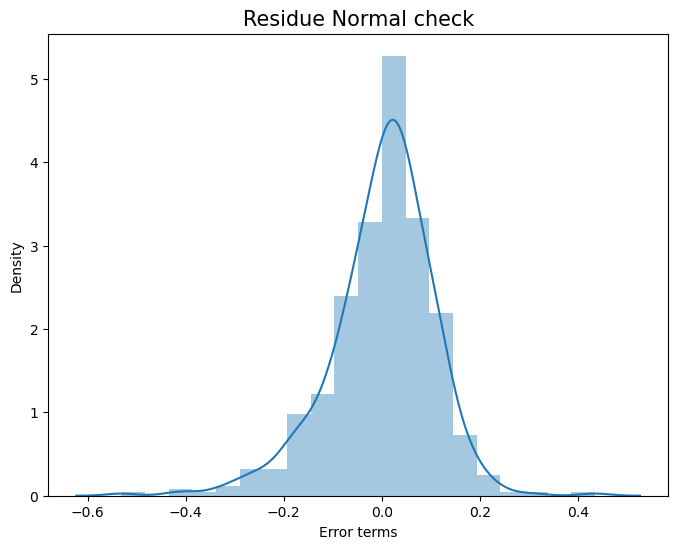

In [75]:
#plotting

plt.figure(figsize=(8,6))
sns.distplot(res,bins=20)
plt.title('Residue Normal check',fontsize=15)
plt.xlabel('Error terms',fontsize = 10)
plt.show()

Assumption are valid as the error terms are normally distributed
 - So sum of errors is 0
 - Mean of errors is 0

## Prediction

- Preparing the test data exactly like the train data

In [76]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,December,February,January,July,June,March,May,November,October,September
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [77]:
# scaling
var = ['atemp','hum','windspeed','cnt']
df_test[var] = scaler.transform(df_test[var])
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,December,February,January,July,June,March,May,November,October,September
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [78]:
# Making X_test and y_test

y_test = df_test['cnt']
X_test = df_test.drop(['cnt'],axis = 1)

y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [79]:
# Selecting only the required predictors

X_test_new = X_test[X_train_lm10.columns]
X_test_new.shape

(220, 11)

- Predict

In [80]:
# Add conctant to test data and predicting data

X_test_sm = sm.add_constant(X_test_new)
X_test_sm.shape

(220, 12)

In [81]:
#Predicting
y_test_pred = lr10.predict(X_test_sm)

## Model Evaluation

- y_test VS y_test_prediction


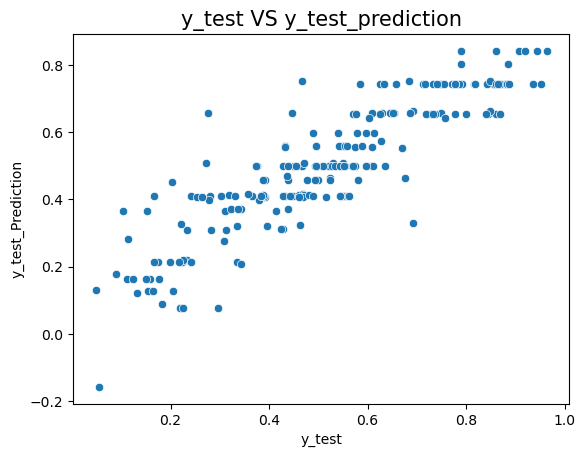

In [82]:
#Plotting 

plt.figure()
sns.scatterplot(x=y_test, y=y_test_pred)
plt.title('y_test VS y_test_prediction',fontsize=15)
plt.xlabel('y_test',fontsize = 10)
plt.ylabel('y_test_Prediction',fontsize = 10)

plt.show()

Model looks good enogh to predict the demand of bikes as there is a significant amount of overlapping between predicted and actual values

**Mean Squared Error Check**

In [83]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

meanSE = mean_squared_error(y_true= y_test, y_pred=y_test_pred)
meanSE

0.010506868788368278

In [84]:
np.sqrt(meanSE)

0.10250301843540159

**R- Squared Check**

In [85]:
r_squared = r2_score(y_true= y_test, y_pred=y_test_pred)
r_squared

0.7802566744370167

**The R2 value of our model (LM10) is 0.77 and the predicted value is 0.78 so the model can be concluded as a good one to predict the demand of bikes**